In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential
import time
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, LSTM
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
diabetes = pd.read_csv('C:/Users/Imane/OneDrive/Desktop/Data/diabetes.csv')

In [4]:
diabetes.drop(['SkinThickness'], axis = 1, inplace = True)

In [5]:
diabetes = diabetes[(diabetes.BloodPressure != 0) & (diabetes.BMI != 0) & (diabetes.Glucose != 0)]

In [20]:
diabetes['decade'] = [age // 10*10 for age in diabetes.Age]

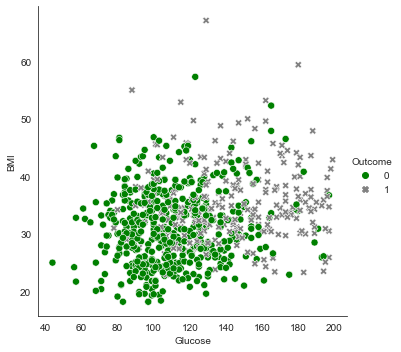

In [37]:
sns.relplot(x = 'Glucose', y = 'BMI',
           data = diabetes,  
           hue = 'Outcome', 
           s = 50, 
           palette = ['green', 'grey'], 
           style = 'Outcome')

In [49]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,0,137,40,168,43.1,2.288,33,1


In [34]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,0,137,40,168,43.1,2.288,33,1


In [50]:
zero_glucose = diabetes[diabetes['Glucose'] == 0 ] #0
zero_pressure = diabetes[diabetes['BloodPressure'] == 0 ] #0
zero_bmi = diabetes[diabetes['BMI'] == 0 ] #0
# zero_skin = diabetes[diabetes['SkinThickness'] == 0 ] #227
zero_ins = diabetes[diabetes['Insulin'] == 0 ] #347

In [54]:
zero_ins.shape

(332, 8)

C:\Users\Imane\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


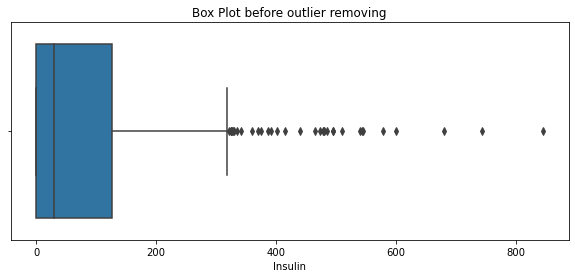

In [46]:
def Box_plots(df):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot before outlier removing")
    sns.boxplot(df)
    plt.show()

Box_plots(diabetes['Insulin'])

In [47]:
np.unique(diabetes['Insulin'])

array([  0,  14,  15,  16,  18,  22,  23,  25,  29,  32,  36,  37,  38,
        40,  41,  42,  43,  44,  45,  46,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  63,  64,  65,  66,  67,
        68,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  94,  95,  96,
        99, 100, 105, 106, 108, 110, 112, 114, 115, 116, 119, 120, 122,
       125, 126, 127, 128, 129, 130, 132, 135, 140, 142, 144, 145, 146,
       148, 150, 152, 155, 156, 158, 159, 160, 165, 166, 167, 168, 170,
       171, 175, 176, 178, 180, 182, 183, 184, 185, 188, 190, 191, 192,
       193, 194, 196, 200, 204, 205, 207, 210, 215, 220, 225, 228, 230,
       231, 235, 237, 240, 245, 249, 250, 255, 258, 265, 270, 271, 272,
       274, 275, 277, 278, 280, 284, 285, 291, 293, 300, 304, 310, 318,
       321, 325, 326, 328, 330, 335, 342, 360, 370, 375, 387, 392, 402,
       415, 440, 465, 474, 478, 480, 485, 495, 510, 540, 543, 54

In [68]:
X = diabetes.drop(['Outcome'], axis = 1)
y = diabetes['Outcome']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7)

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [104]:
lr = LogisticRegression(random_state=42)
rf  = RandomForestClassifier(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
gus = GaussianNB()
knn = KNeighborsClassifier()
lin_svc = LinearSVC(random_state=42)
ada = AdaBoostClassifier(random_state=42)
grd  = GradientBoostingClassifier(random_state=42)
models = [lr, rf, dt, gus, knn, lin_svc, ada, grd]

In [125]:
def evaluate_model(model):
    evaluation = []
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        precision = precision_score(y_test, y_pred, average = 'weighted', zero_division = 0)
        recall = recall_score(y_test, y_pred, average = 'weighted', zero_division = 0)
        f1 = f1_score(y_test,y_pred, average = 'weighted', zero_division = 0)
        accuracy = accuracy_score(y_test,y_pred)
        evaluation.append([model, accuracy, f1, precision, recall])
    return evaluation

In [ ]:
statistics = evaluate_model(models)

stat = pd.DataFrame(statistics, columns=['Name','Accuracy','F1','Precision','Recall'])

In [128]:
stat

,Name,Accuracy,F1,Precision,Recall
0,LogisticRegression(random_state=42),0.779817,0.770769,0.774014,0.779817
1,"(DecisionTreeClassifier(max_features='auto', r...",0.798165,0.793138,0.793544,0.798165
2,DecisionTreeClassifier(random_state=42),0.688073,0.692501,0.699774,0.688073
3,GaussianNB(),0.775229,0.770179,0.769470,0.775229
4,KNeighborsClassifier(),0.724771,0.721662,0.719694,0.724771
5,LinearSVC(random_state=42),0.692661,0.597482,0.749099,0.692661
6,"(DecisionTreeClassifier(max_depth=1, random_st...",0.733945,0.729804,0.727746,0.733945
7,([DecisionTreeRegressor(criterion='friedman_ms...,0.784404,0.779560,0.779135,0.784404


In [114]:
print(statistics)

[[LogisticRegression(random_state=42), 0.7798165137614679, 0.7707687954247587, 0.7740141324314228, 0.7798165137614679], [RandomForestClassifier(random_state=42), 0.7981651376146789, 0.7931377198701794, 0.7935439743345344, 0.7981651376146789], [DecisionTreeClassifier(random_state=42), 0.6880733944954128, 0.6925009241523002, 0.6997736102411687, 0.6880733944954128], [GaussianNB(), 0.7752293577981652, 0.7701791400959312, 0.769469802171785, 0.7752293577981652], [KNeighborsClassifier(), 0.7247706422018348, 0.7216623569834579, 0.7196942561026812, 0.7247706422018348], [LinearSVC(random_state=42), 0.6926605504587156, 0.5974820493922877, 0.7490989515072085, 0.6926605504587156], [AdaBoostClassifier(random_state=42), 0.7339449541284404, 0.7298044223378121, 0.7277457207300705, 0.7339449541284404], [GradientBoostingClassifier(random_state=42), 0.7844036697247706, 0.7795595833573219, 0.7791345110448396, 0.7844036697247706]]


In [78]:
classifier = DecisionTreeClassifier(random_state=42)

classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [80]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [81]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  1.0


In [82]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [83]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.6880733944954128


In [136]:
X.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,0,33.6,0.627,50
1,1,85,66,0,26.6,0.351,31
2,8,183,64,0,23.3,0.672,32
3,1,89,66,94,28.1,0.167,21
4,0,137,40,168,43.1,2.288,33


In [137]:
input_data = (0, 92, 80, 84 , 27.5, 0.47, 46)

input_array = np.asarray(input_data)

input_reshaped = input_array.reshape(1, -1)

prediction = classifier.predict(input_reshaped)
print(prediction)

if (prediction[0] == 0):
    print('The person is not diabetic')
else:
      print('The person is diabetic')

[0]
The person is not diabetic


C:\Users\Imane\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
